**Problem Statement**<br>

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.<br>

**Goals and Objectives**<br>

There are quite a few goals for this case study.<br>

Build a logistic regression model to assign a lead score between 0 and 100 to 

1.   Each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.<br>
2.   There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well.


In [1]:
# Importing the necessary libaries and supressing warning.

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


**STEP 1: LOADING AND CLEANING THE DATA**

1.1 Importing data set

In [2]:
# Importing the data set.

lead = pd.read_csv('Leads.csv')

In [3]:
# Viewing the heads column of the data frame.

lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


1.2 Inspecting the dataframe

In [4]:
# The .info() code gives almost the entire information that needs to be inspected, so let's start from there
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Checking the shape of the dataframe.

lead.shape

(9240, 37)

In [6]:
# Checking the statistical summary of the dataframe.

lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

1.3 Cleaning the dataframe

In [7]:
# Converting all the values to lower case.

lead = lead.applymap(lambda x: x.lower() if type (x) == str else x)

In [8]:
# Replacing 'Select' with NaN (Since it means no option is selected).

lead = lead.replace('select',np.nan)

In [9]:
# Checking the columns with one unique value as they will add no meaning to analysis.

lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [10]:
# Dropping the column with 1 unique value.

lead_1= lead.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)


In [11]:
# Checking the missing value % for each column.

round(100*(lead_1.isnull().sum()/len(lead_1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [12]:
# Removing the null values that are not requiered and having null value 35% and above.

lead_2 = lead_1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
lead_2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [13]:
# Re-checking null value % for all the columns.

round(100*(lead_2.isnull().sum()/len(lead_2.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

Inference: As we can see that few columns have higher % of null values and we cannot impute them as the quality of analysis would be affected. So we will replcae the NaN value with 'not provided'. This way we will be able to make quality analysis with the null values.

In [14]:
lead_2['Specialization'] = lead_2['Specialization'].fillna('not provided') 
lead_2['What matters most to you in choosing a course'] = lead_2['What matters most to you in choosing a course'].fillna('not provided')
lead_2['Country'] = lead_2['Country'].fillna('not provided')
lead_2['What is your current occupation'] = lead_2['What is your current occupation'].fillna('not provided')
lead_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [15]:
# Re checking the missing value % after replacing the NaN values with 'not provided'.

round(100*(lead_2.isnull().sum()/len(lead_2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [16]:
# Checking the value counts of all the column.

lead_2['Country'].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

Inference: As we can see that there are lot of country name so we can create 3 class to make the analysis effecient.

In [17]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

lead_2['Country'] = lead_2.apply(lambda x:slots(x['Country']), axis = 1)
lead_2['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [18]:
# Re-checking the % of null values.

round(100*(lead_2.isnull().sum()/len(lead_2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [19]:
# Checking the percent of lose if the null values are removed.

round(100*(sum(lead_2.isnull().sum(axis=1) > 1)/lead_2.shape[0]),2)

1.48

In [20]:
lead_3 = lead_2[lead_2.isnull().sum(axis=1) <1]

In [21]:
# Code for checking number of rows left in percent.

round(100*(lead_3.shape[0])/(lead.shape[0]),2)

98.2

In [22]:
# rechecking the % of null values.

round(100*(lead_3.isnull().sum()/len(lead_3.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [23]:
# To familiarize all the categorical values.

for column in lead_3:
    print(lead_3[column].astype('category').value_counts())
    print('-------------------------------------------------------------------')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9074, dtype: int64
-------------------------------------------------------------------
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64
-------------------------------------------------------------------
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      129
referral sites        125
facebook      

In [24]:
# Removing the Prospect ID column as all the values are unique.

lead_main = lead_3.drop('Prospect ID',1)
lead_main.shape

(9074, 21)

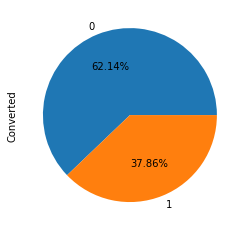

In [25]:
# Input data shows 38% of Conversion
lead_main.Converted.value_counts().plot.pie(autopct=f"%1.{2}f%%",)

**STEP 2: EDA**<br>

Univariate Analysis<br>

2.1.1 Categorical Values

In [26]:
lead_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

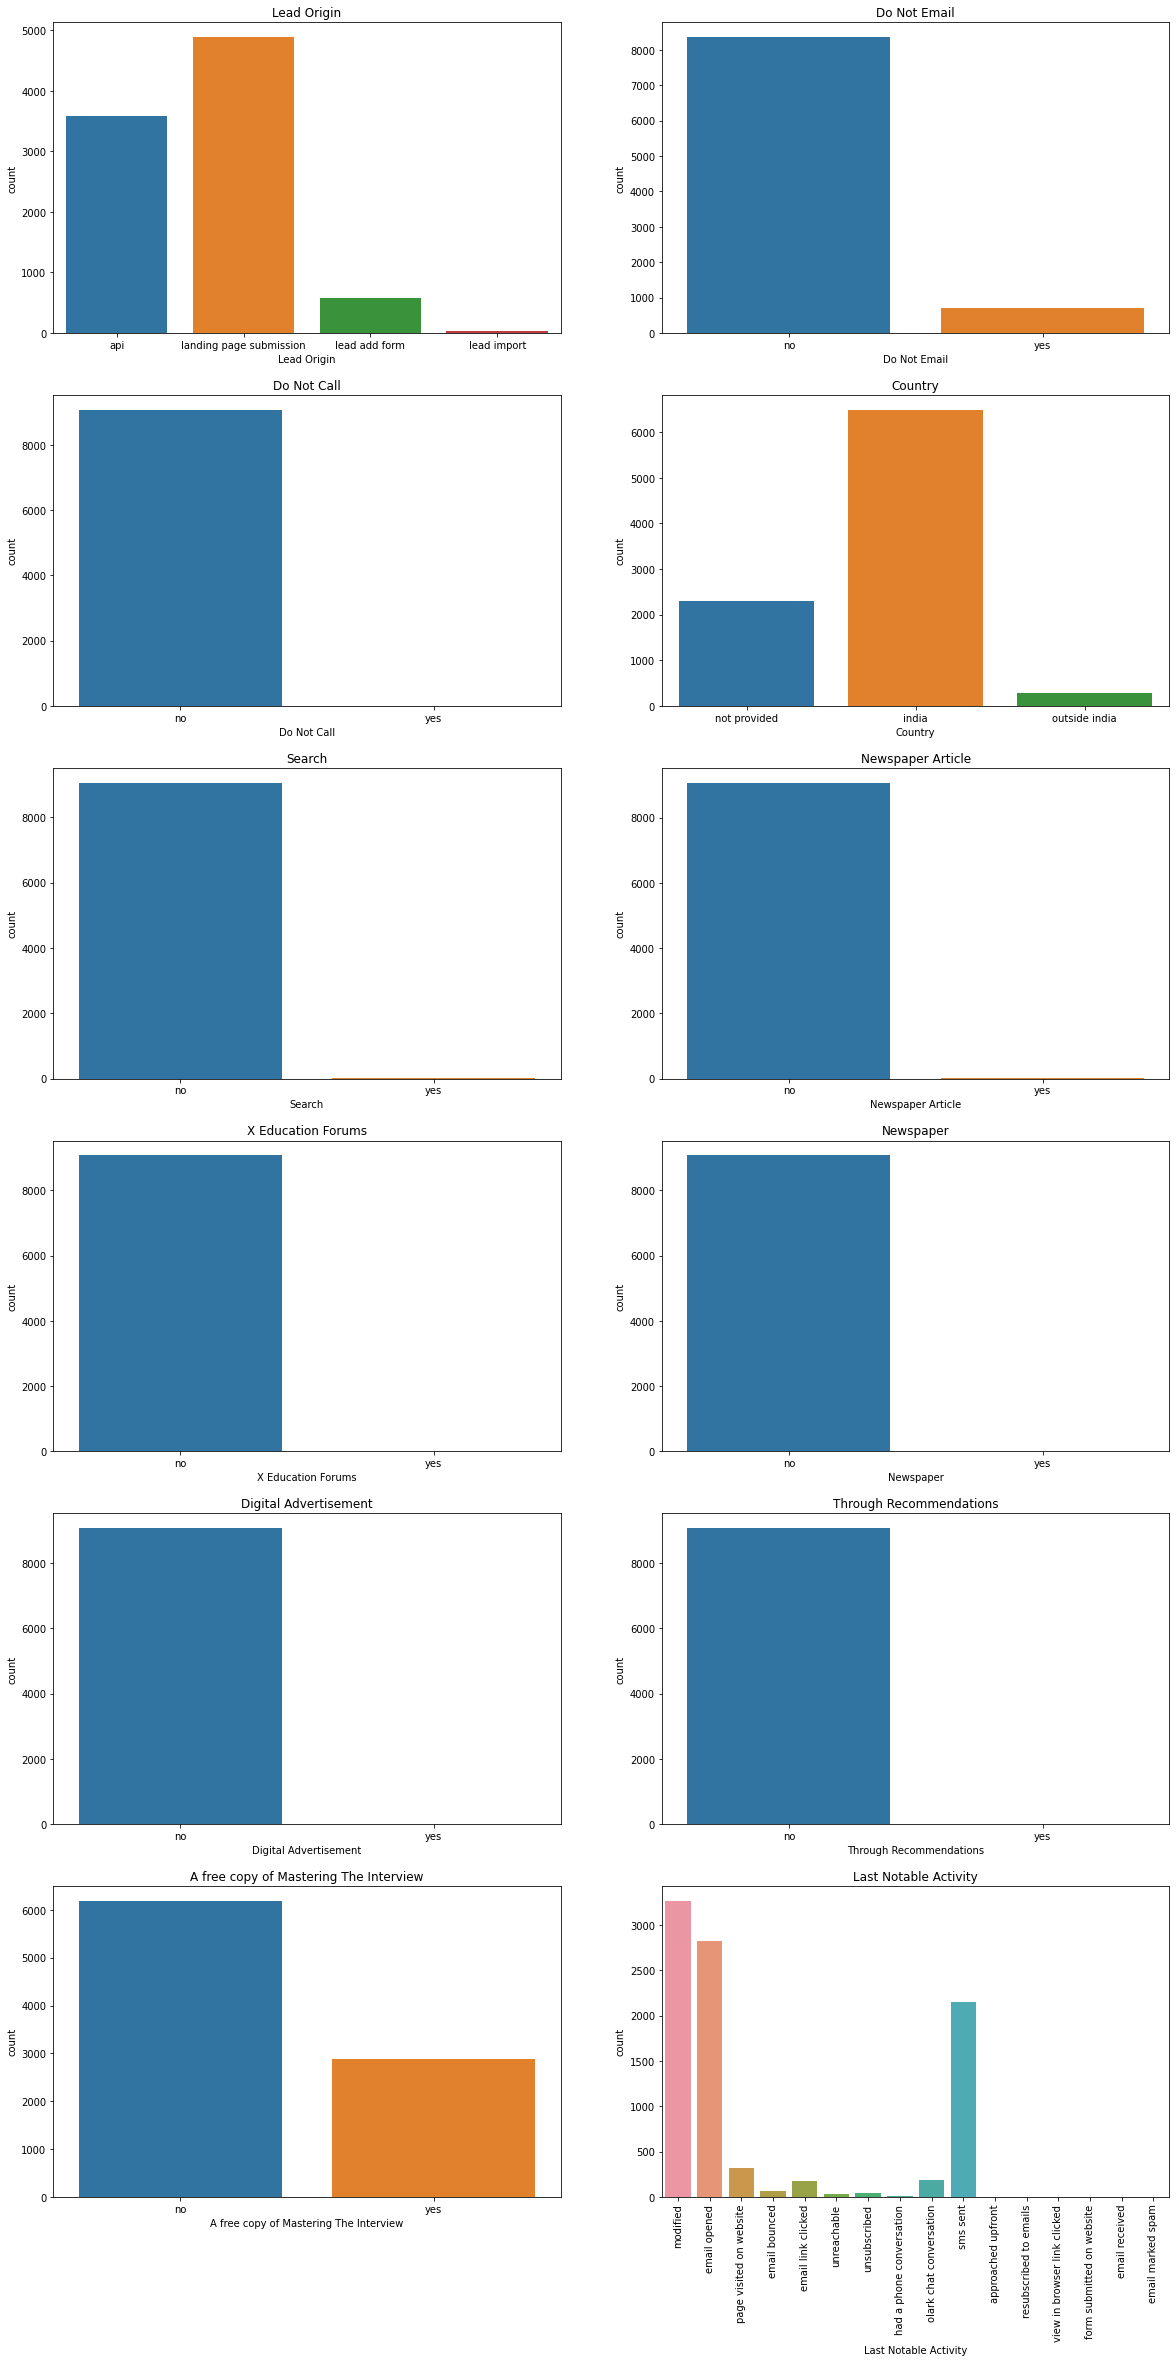

In [27]:
# Plotting the below graphs fro EDA of categorical values.

plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(lead_main['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(lead_main['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(lead_main['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(lead_main['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(lead_main['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(lead_main['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(lead_main['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(lead_main['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(lead_main['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(lead_main['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(lead_main['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(lead_main['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()


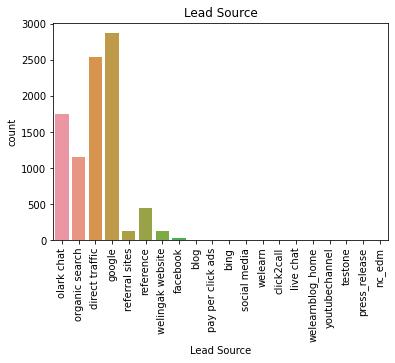

In [28]:
# Checking the Lead Source visually to understand the trend of the variable.

sns.countplot(lead_main['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

Inference: We can see that maximum lead are coming throgh google, direct traffic and olark chat.

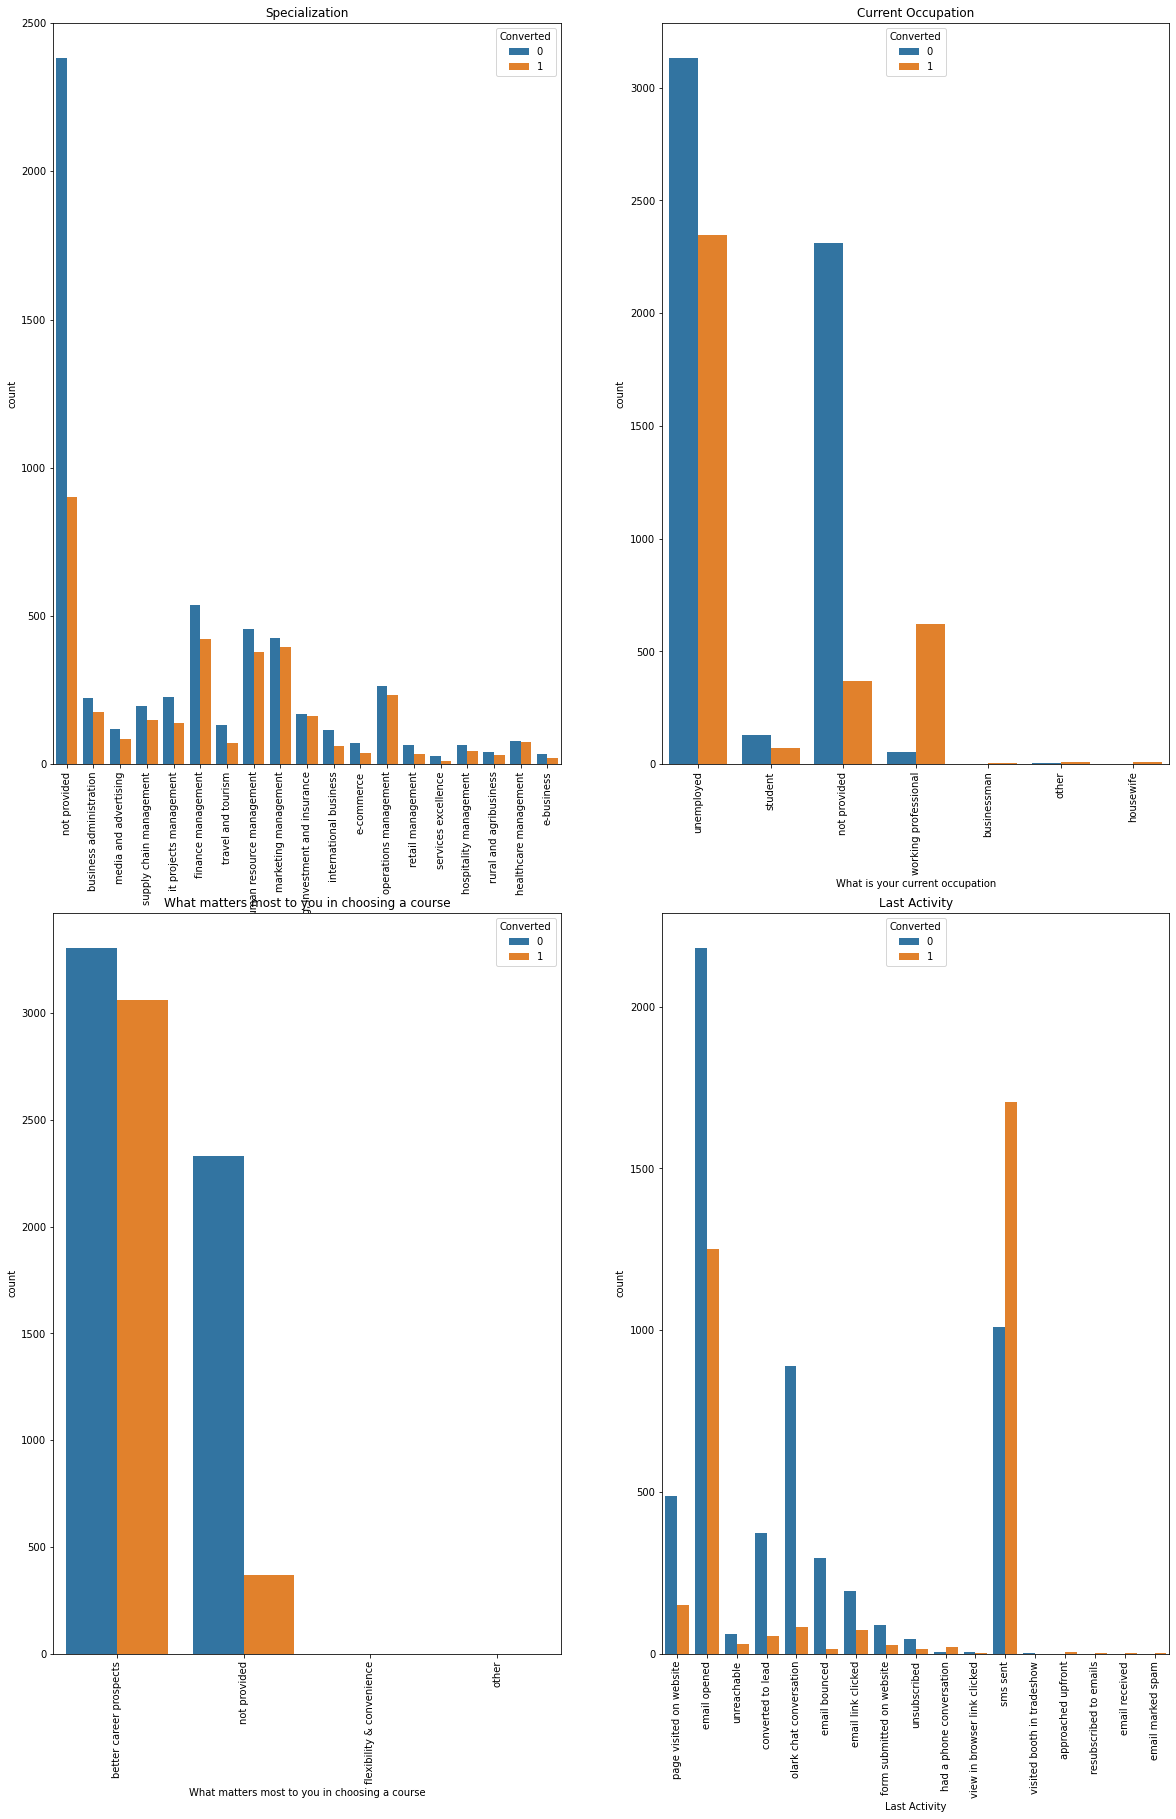

In [29]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(data=lead_main, x=lead_main['Specialization'], hue="Converted").tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(data=lead_main, x=lead_main['What is your current occupation'], hue="Converted").tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(data=lead_main, x=lead_main['What matters most to you in choosing a course'], hue="Converted").tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(data=lead_main, x=lead_main['Last Activity'], hue="Converted").tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

Inference:<br>

1.   Maximum lead are unemployed and looking for upskilling to get employable.
2.   Most of the leads are looking for better career prospects by enrolling them for upskilling courses.
3.   Important communication can be done through email and SMS as this mode are used maximum used by the learners.
4.   There are patches of specialization where Conversion ratio is high.

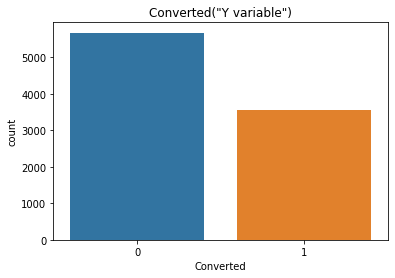

In [30]:
sns.countplot(lead['Converted'])
plt.title('Converted("Y variable")')
plt.show()

2.2.1 Numerical Variables.

In [31]:
lead_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

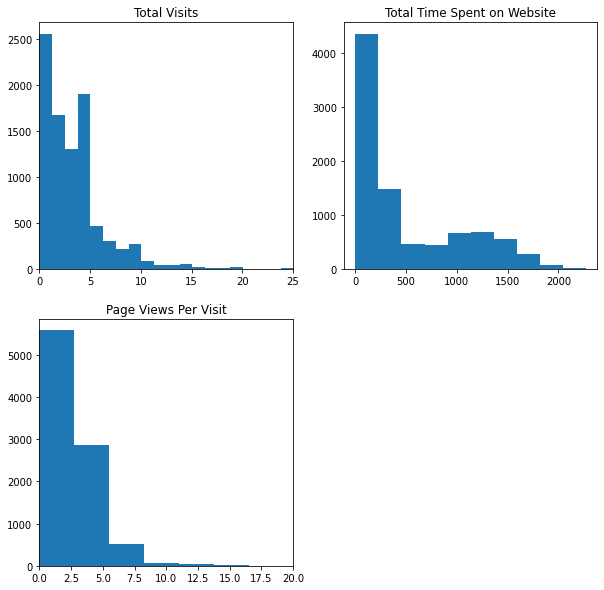

In [32]:
# Plotting the continious variable for better understanding visually.

plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(lead_main['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(lead_main['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(lead_main['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

2.1 Relating all the categorical variables to be converted.

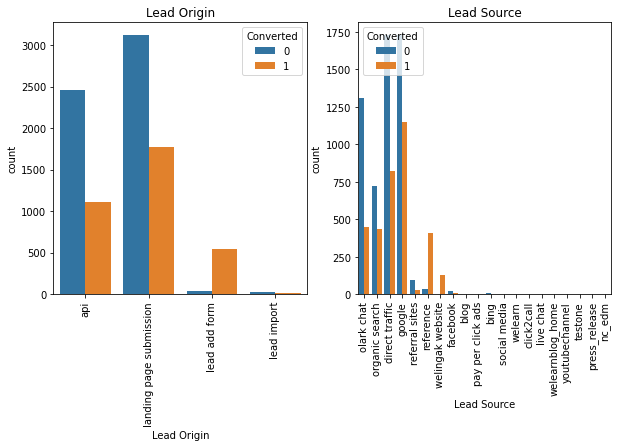

In [33]:
# Checking the lead origin & lead source variable visually

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead_main).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead_main).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

Inference:<br>

1.   Maximum lead are converted to sales from 'landing page submission' followed by api.
2.   Lead form advertisment are not getting converted to sales.
3.   Lead from google & direct traffics are getting converted the most as leads from this source can be considered hot as learners are inetrested in upskilling.



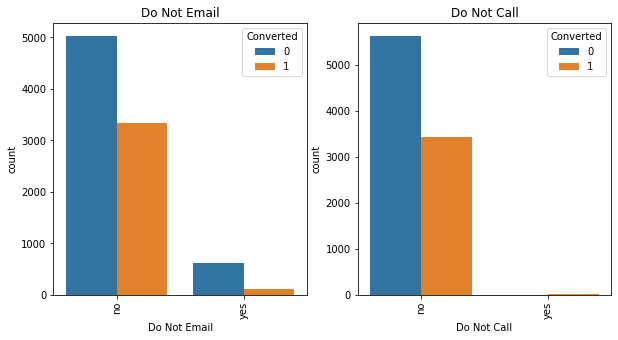

In [34]:
# Plotting Do not email & Do not call variable.

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= lead_main).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= lead_main).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

Inference: Learners donot prefer receiving Email or call from X Education.

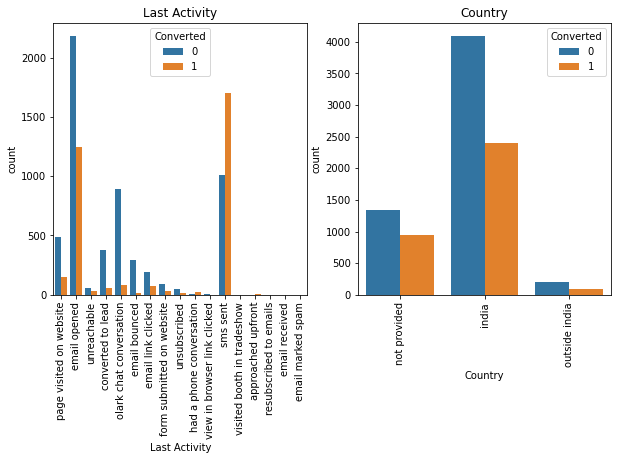

In [35]:
# Plotting Last activity adn country variable.

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= lead_main).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= lead_main).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

Inference: Majority of learners uses email and SMS sent by X Education.So marketing communication can be used using this channels.

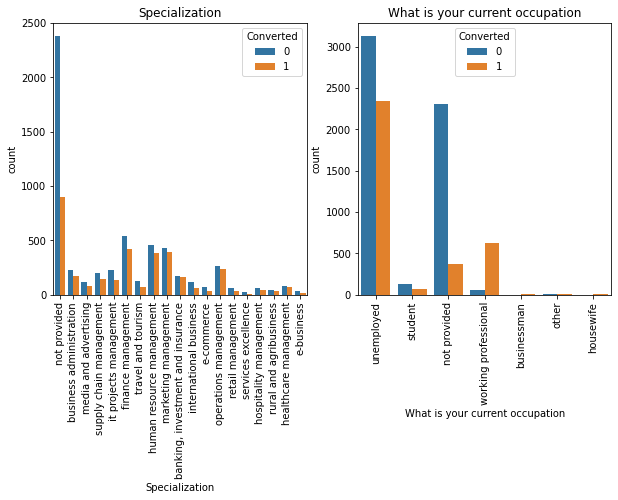

In [36]:
# Plotting the variable specilization & what is current occupation.

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= lead_main).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead_main).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

Inference: 1. Maximum learner who are enrolling for the course are unemployed and doing the course in search for better prospect.
2. Working professional have a higher chance of getting converted.

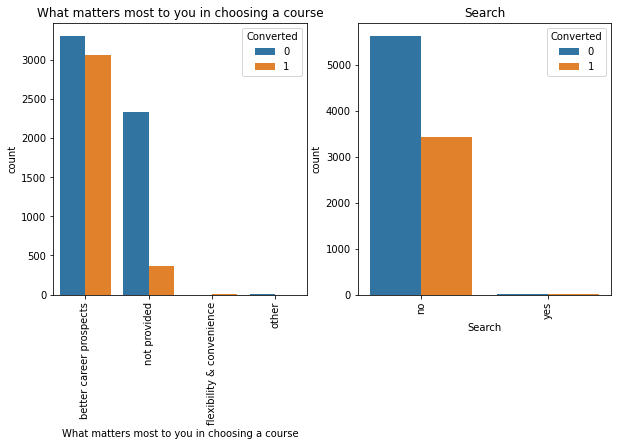

In [37]:
# Plotting the variable Search & what matters most you in choosing a course.

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= lead_main).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= lead_main).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

Inference: Maximum learners are looking for better career prsopect throgh the upskilling program in X Education.

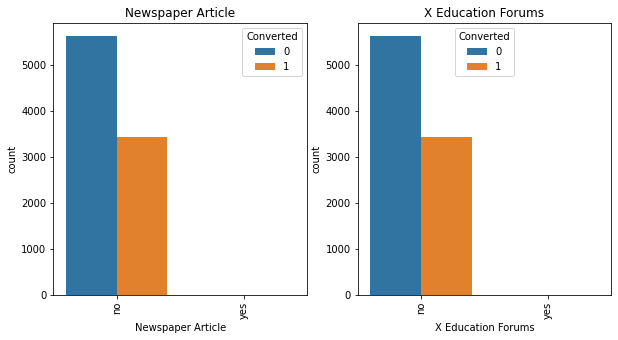

In [38]:
# Plotting the variable Newspaper Article and X Education Forums.

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= lead_main).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= lead_main).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

Comemnts: Newspaper article & X education forum are not effective medium for marketing communcaition as lead conversion is least.

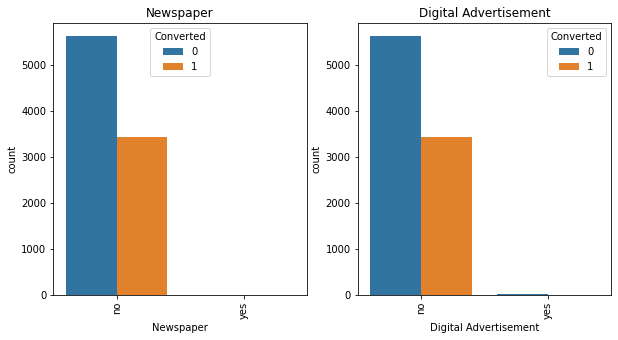

In [39]:
# Plotting variable Newspaper & Digital Advertisemnet.

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= lead_main).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= lead_main).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

Inference: Newspaper & Digital Advertsiement are not effective medium for marketing communcaition as lead conversion is least.

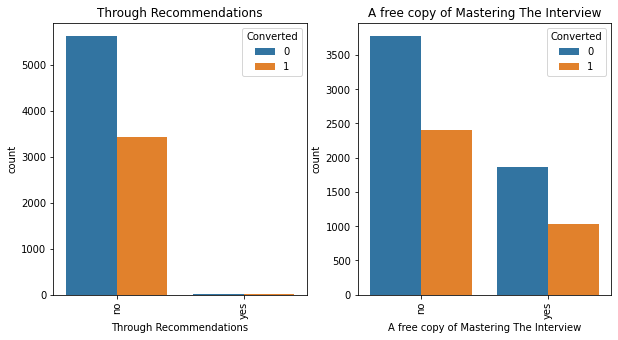

In [40]:
# Plotting variable Through recommendations and A free copy of Mastering the Interview.

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= lead_main).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= lead_main).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

Inference: Free sample class or career building class is effective way to converts the leads to sail.

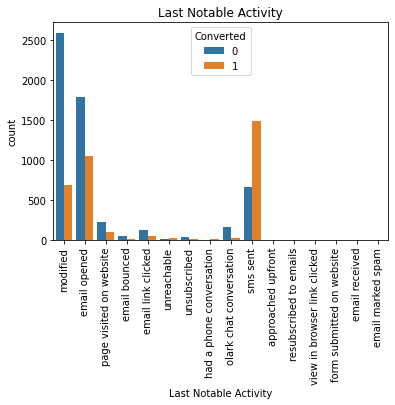

In [41]:
# Plotting the variable Last Notable Activity.

sns.countplot(x='Last Notable Activity', hue='Converted', data= lead_main).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

Inference: SMS Sent or Email Opened is a great last activity from the learner who are interested.

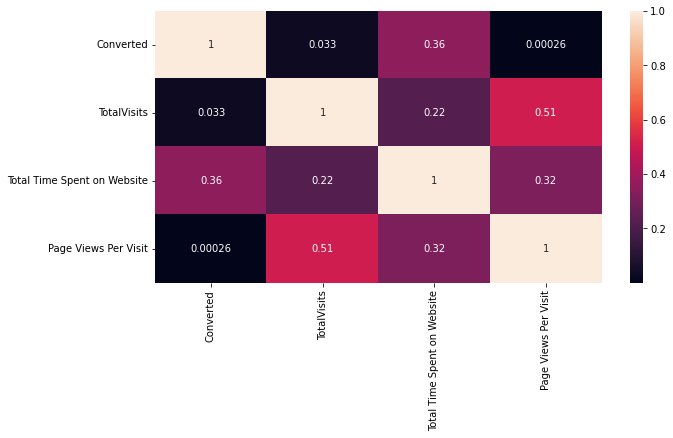

In [42]:
# To check the correlation among varibles

plt.figure(figsize=(10,5))
sns.heatmap(lead_main.corr(), annot=True)
plt.show()

Inference: It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis.

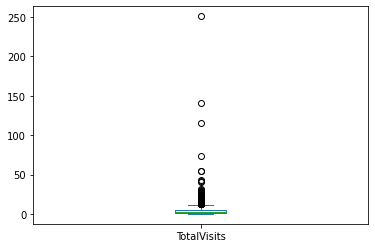

In [43]:
lead_main.TotalVisits.plot.box()

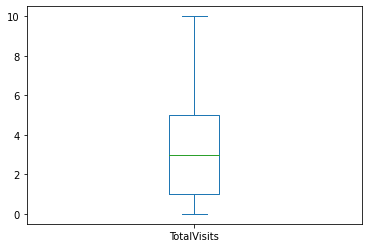

In [44]:
# Outlier handling in Total Visits
percentiles = lead_main.TotalVisits.quantile([0.05,0.95]).values
lead_main["TotalVisits"][lead_main["TotalVisits"]<=percentiles[0]]=percentiles[0]
lead_main["TotalVisits"][lead_main["TotalVisits"]>=percentiles[1]]=percentiles[1]
lead_main.TotalVisits.plot.box()

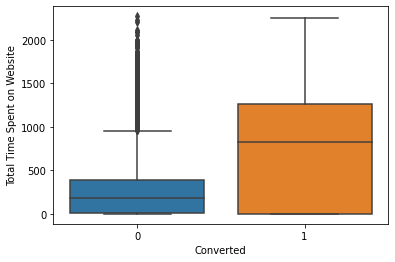

In [45]:
sns.boxplot(data=lead_main, y="Total Time Spent on Website", x="Converted")

Inference: Leads spending more times on the website are more likely to be Converted

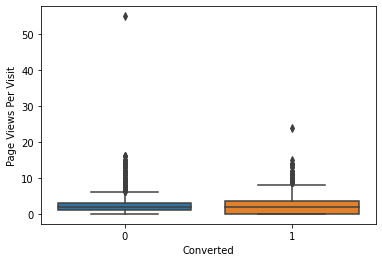

In [46]:
sns.boxplot(data=lead_main, y="Page Views Per Visit", x="Converted")

In [47]:
# Outlier handling in Page Views Per Visit
percentiles = lead_main["Page Views Per Visit"].quantile([0.05,0.95]).values
lead_main["Page Views Per Visit"][lead_main["Page Views Per Visit"]<=percentiles[0]] = percentiles[0]
lead_main["Page Views Per Visit"][lead_main["Page Views Per Visit"]>=percentiles[1]] = percentiles[1]

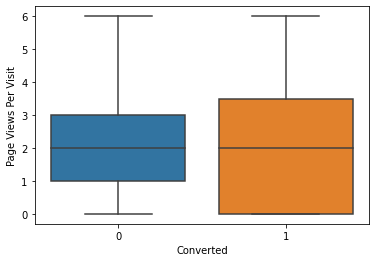

In [48]:
sns.boxplot(data=lead_main, y="Page Views Per Visit", x="Converted")

Inference: Median for the Page Views per Visit is same; cannot conlude something concrete.

In [49]:
# Checking for outliers in the continious variable.

numeric = lead_main[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.191867,482.887481,2.265943
std,2.780618,545.256560,1.790991
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,10.000000,1839.000000,6.000000
max,10.000000,2272.000000,6.000000


Inference: There aren't any major outliers, so moving on to analysis

**STEP 3: DUMMY VARIABLES**

In [50]:
lead_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [51]:
# Checking the categorical variable columns.

lead_main.loc[:, lead_main.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [52]:
# Create dummy variables using the 'get_dummies'

dummy = pd.get_dummies(lead_main[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe

lead_main_dum = pd.concat([lead_main, dummy], axis=1)
lead_main_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,outside india,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0


In [53]:
# Dropping the categorical variable as dummy variable has been created for the same.

lead_main_dum = lead_main_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
lead_main_dum


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


**STEP 4: TRAIN-TEST SPLIT**

In [54]:
# Splitting the data for train & test.

X = lead_main_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [55]:
# Putting the target variable in y.

y = lead_main_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [56]:
# Split the dataset into 70% and 30% for train and test respectively.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [57]:
# Scalling the contionious variable.

scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.2,0.612676,0.333333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3604,0.0,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.6,0.751761,1.000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.0,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.2,0.787852,0.333333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


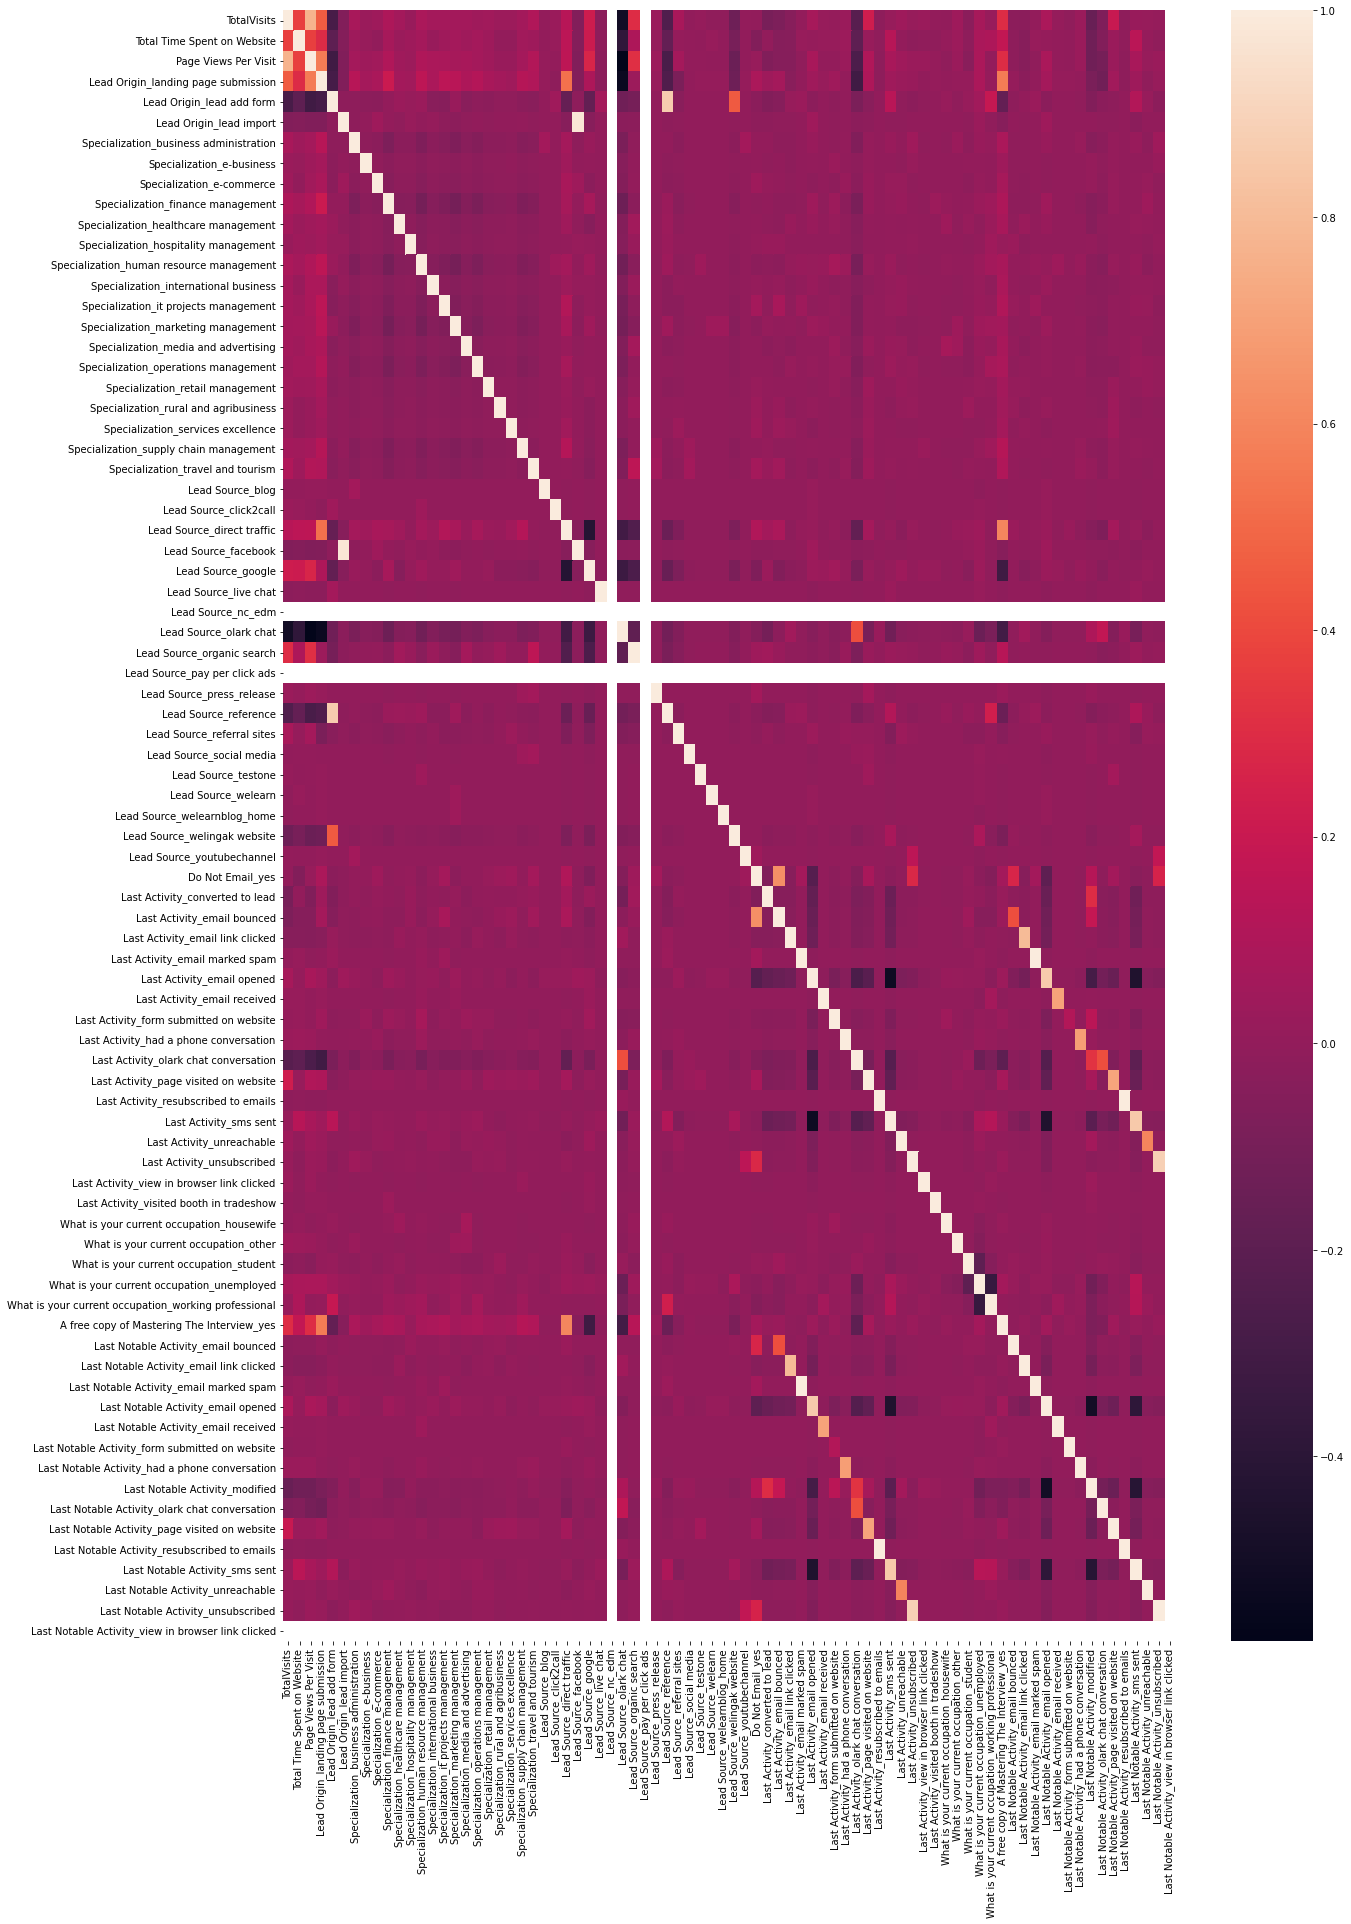

In [58]:
# To check the correlation among varibles

plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

Inference: Since there are lot of variables we will use RFE to build the model as it would be difficult to drop the vraiable.

**STEP 5: MODEL BUILDING**

In [59]:
# Import 'LogisticRegression'

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [60]:
# Import RFE.
from sklearn.feature_selection import RFE

In [61]:
# Running RFE with 15 variables as output.

rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [62]:
# Features that have been selected by RFE.

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_landing page submission', False, 28),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 41),
 ('Specialization_business administration', False, 35),
 ('Specialization_e-business', False, 31),
 ('Specialization_e-commerce', False, 23),
 ('Specialization_finance management', False, 32),
 ('Specialization_healthcare management', False, 26),
 ('Specialization_hospitality management', False, 43),
 ('Specialization_human resource management', False, 33),
 ('Specialization_international business', False, 38),
 ('Specialization_it projects management', False, 30),
 ('Specialization_marketing management', False, 22),
 ('Specialization_media and advertising', False, 39),
 ('Specialization_operations management', False, 27),
 ('Specialization_retail management', False, 61),
 ('Specialization_rural and agribusiness', False, 25),
 ('Specialization_ser

In [63]:
# Put all the columns selected by RFE in the variable 'col'.

col = X_train.columns[rfe.support_]

Inference: Through RFE we have selected the top 15 variable for analysis. Now we will use P value and VIF to get the best model for the problem.

In [64]:
# Selecting columns selected by RFE.

X_train = X_train[col]

In [65]:
# Importing statsmodels

import statsmodels.api as sm

In [66]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2704.3
Date:                Tue, 24 Jan 2023   Deviance:                       5408.6
Time:                        15:23:01   Pearson chi2:                 6.31e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5714      0.093    -27.737      0.000      -2.753      -2.390
Total Time Spent on Website                              3.9100      0.147     26.617      0.000       3.622       4.198
Lead Origin_lead add form                                2.9011      0.219     13.271      0.000       2.473       3.330
Lead Source_direct traffic                              -0.6698      0.081     -8.311      0.000      -0.828      -0.512
Lead Source_organic search                              -0.4298      0.102     -4.210      0.000      -0.630      -0.230
Lead Source_welingak website                             2.5670      1.032      2.488      0.013       0.545       4.589
Do Not Email_yes                                        -1.3430      0.167     -8.058      0.000      -1.670      -1.016
Last Activity_olark chat conversation                   -1.0514      0.165     -6.368      0.000      -1.375      -0.728
Last Activity_sms sent                                   1.2805      0.073     17.589      0.000       1.138       1.423
What is your current occupation_housewife               24.1648   1.92e+04      0.001      0.999   -3.75e+04    3.76e+04
What is your current occupation_other                    2.3197      0.754      3.077      0.002       0.842       3.797
What is your current occupation_student                  1.3007      0.226      5.752      0.000       0.858       1.744
What is your current occupation_unemployed               1.1104      0.085     13.108      0.000       0.944       1.276
What is your current occupation_working professional     3.5799      0.203     17.615      0.000       3.182       3.978
Last Notable Activity_had a phone conversation          22.7790   1.41e+04      0.002      0.999   -2.75e+04    2.76e+04
Last Notable Activity_unreachable                        1.7274      0.612      2.823      0.005       0.528       2.927
========================================================================================================================
"""

In [67]:
# Importing 'variance_inflation_factor'.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
# Make a VIF dataframe for all the variables present.

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_unemployed,2.17
0,Total Time Spent on Website,1.90
1,Lead Origin_lead add form,1.57
2,Lead Source_direct traffic,1.51
7,Last Activity_sms sent,1.51
4,Lead Source_welingak website,1.31
12,What is your current occupation_working profes...,1.30
3,Lead Source_organic search,1.23
5,Do Not Email_yes,1.09
6,Last Activity_olark chat conversation,1.05


**Below is the approach we will use to drop the variable and check model efficiency:**

These conditions are formulated after studying the VIF, p-values and going through the course content.

High p-value, high VIF : definitely drop

High-Low:

High p, low VIF : remove these first, then build model again and check VIF again
Low p, high VIF : remove these later

Low p-value, low VIF : keep variable

Inference: VIF value are fine as its below the threshold but p-values are not. Hence removing 'Last Notable Activity had a phone conversation'.

In [69]:
# Dropping the first variable as p score is high.

X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

In [70]:
# Refit the model with the new set of features.

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2711.0
Date:                Tue, 24 Jan 2023   Deviance:                       5422.0
Time:                        15:23:01   Pearson chi2:                 6.31e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5656      0.093    -27.710      0.000      -2.747      -2.384
Total Time Spent on Website                              3.9068      0.147     26.637      0.000       3.619       4.194
Lead Origin_lead add form                                2.8927      0.219     13.236      0.000       2.464       3.321
Lead Source_direct traffic                              -0.6760      0.081     -8.395      0.000      -0.834      -0.518
Lead Source_organic search                              -0.4296      0.102     -4.215      0.000      -0.629      -0.230
Lead Source_welingak website                             2.5673      1.032      2.488      0.013       0.545       4.589
Do Not Email_yes                                        -1.3463      0.167     -8.082      0.000      -1.673      -1.020
Last Activity_olark chat conversation                   -1.0600      0.165     -6.422      0.000      -1.384      -0.736
Last Activity_sms sent                                   1.2733      0.073     17.505      0.000       1.131       1.416
What is your current occupation_housewife               23.1609   1.16e+04      0.002      0.998   -2.27e+04    2.28e+04
What is your current occupation_other                    2.3203      0.754      3.077      0.002       0.842       3.798
What is your current occupation_student                  1.3005      0.226      5.753      0.000       0.857       1.744
What is your current occupation_unemployed               1.1165      0.085     13.189      0.000       0.951       1.282
What is your current occupation_working professional     3.5811      0.203     17.628      0.000       3.183       3.979
Last Notable Activity_unreachable                        1.7195      0.612      2.809      0.005       0.520       2.919
========================================================================================================================
"""

In [71]:
# Rechecking VIF of all the variables.

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_unemployed,2.16
0,Total Time Spent on Website,1.90
1,Lead Origin_lead add form,1.57
2,Lead Source_direct traffic,1.51
7,Last Activity_sms sent,1.51
4,Lead Source_welingak website,1.31
12,What is your current occupation_working profes...,1.30
3,Lead Source_organic search,1.23
5,Do Not Email_yes,1.09
6,Last Activity_olark chat conversation,1.05


Inference: VIF Score are fine but p-values are not.

In [72]:
# Dropping the second variable 'What is your current occupation_housewife' as p-value is high.

X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [73]:
# Refit the model with the new set of features.

X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2718.9
Date:                Tue, 24 Jan 2023   Deviance:                       5437.8
Time:                        15:23:02   Pearson chi2:                 6.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5445      0.092    -27.664      0.000      -2.725      -2.364
Total Time Spent on Website                              3.9053      0.146     26.664      0.000       3.618       4.192
Lead Origin_lead add form                                2.9125      0.219     13.326      0.000       2.484       3.341
Lead Source_direct traffic                              -0.6727      0.080     -8.367      0.000      -0.830      -0.515
Lead Source_organic search                              -0.4171      0.102     -4.104      0.000      -0.616      -0.218
Lead Source_welingak website                             2.5512      1.032      2.473      0.013       0.529       4.573
Do Not Email_yes                                        -1.3507      0.166     -8.113      0.000      -1.677      -1.024
Last Activity_olark chat conversation                   -1.0665      0.165     -6.466      0.000      -1.390      -0.743
Last Activity_sms sent                                   1.2655      0.073     17.424      0.000       1.123       1.408
What is your current occupation_other                    2.2958      0.754      3.045      0.002       0.818       3.773
What is your current occupation_student                  1.2781      0.226      5.658      0.000       0.835       1.721
What is your current occupation_unemployed               1.0955      0.084     13.021      0.000       0.931       1.260
What is your current occupation_working professional     3.5593      0.203     17.541      0.000       3.162       3.957
Last Notable Activity_unreachable                        1.7106      0.612      2.797      0.005       0.512       2.909
========================================================================================================================
"""

In [74]:
# Make a VIF dataframe for all the variables present.

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_unemployed,2.16
0,Total Time Spent on Website,1.90
1,Lead Origin_lead add form,1.57
2,Lead Source_direct traffic,1.51
7,Last Activity_sms sent,1.51
4,Lead Source_welingak website,1.31
11,What is your current occupation_working profes...,1.30
3,Lead Source_organic search,1.23
5,Do Not Email_yes,1.09
6,Last Activity_olark chat conversation,1.05


Inference: All VIF score are below 5 and p-values are below 0.05. So we can go ahead with all this variable for model building.

**STEP 6: CREATING PREDICTION**

In [75]:
# Predicting the probabilities on the train set.

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.719849
3604    0.072794
5584    0.201567
7679    0.072794
7563    0.465048
7978    0.749494
7780    0.152089
7863    0.982271
838     0.798664
708     0.252963
dtype: float64

In [76]:
# Reshaping to an array.

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.71984888, 0.07279411, 0.20156707, 0.07279411, 0.46504837,
       0.74949434, 0.15208902, 0.98227148, 0.79866421, 0.25296312])

In [77]:
# Data frame with given convertion rate and probablity of predicted ones.

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.719849
1,0,0.072794
2,0,0.201567
3,0,0.072794
4,0,0.465048


<font color='green'>Assumption: Start with default assumption of 0.5 as cut-off.</font>

In [78]:
# Substituting 0 or 1 with the cut off as 0.5.

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.719849,1
1,0,0.072794,0
2,0,0.201567,0
3,0,0.072794,0
4,0,0.465048,0


**STEP 7: MODEL EVALUATION.**

In [79]:
# Importing metrics from sklearn for evaluation.

from sklearn import metrics

In [80]:
y_train_pred_final.shape

(6351, 3)

In [81]:
# Creating confusion matrix.

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3429,  466],
       [ 814, 1642]])

In [82]:
# Predicted     not_converted    converted
# Actual
# not_converted    3429              466
# converted         814             1642

In [83]:
# Check the overall accuracy.
print("Accuracy :", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))


Accuracy : 0.7984569359156038


Comment: Model shows ~79% accuracy and that is good value for Logistic regression model.

In [84]:
# Substituting the value of true positive.

TP = confusion[1,1]

# Substituting the value of true negatives

TN = confusion[0,0]

# Substituting the value of false positives.

FP = confusion[0,1] 

# Substituting the value of false negatives

FN = confusion[1,0]

In [85]:
print (TP, TN, FP, FN)

1642 3429 466 814


In [86]:
print("Accuracy :", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))
print("False Positive rate : ",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print("Negative Predictive Value : ",TN / float(TN+ FN))

Accuracy : 0.7984569359156038
Sensitivity :  0.6685667752442996
Specificity : 0.8803594351732991
False Positive rate :  0.1196405648267009
Positive Predictive Value : 0.7789373814041746
Negative Predictive Value :  0.8081546075889701


<font color='green'>Inference: We have build a model with over all accuracy of ~80%, with senistivity of around ~67% and specificity of ~88% with current cut-off of 0.5.</font>

**Optimize Cut off(ROC Curve).**

Inference: Previous cut off of 0.5 was randomly selected. Now we will find the optimum one.

In [87]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [88]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

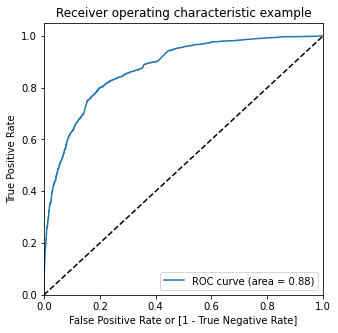

In [89]:
# Using the ROC function.

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

Inference: Area under ROC curve is 0.88 and that good value for ROC Curve.

In [90]:
# Creating columns with different probability cutoffs.

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.719849,1,1,1,1,1,1,1,1,1,0,0
1,0,0.072794,0,1,0,0,0,0,0,0,0,0,0
2,0,0.201567,0,1,1,1,0,0,0,0,0,0,0
3,0,0.072794,0,1,0,0,0,0,0,0,0,0,0
4,0,0.465048,0,1,1,1,1,1,0,0,0,0,0


In [91]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity.

from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.604629,0.979235,0.368421
0.2,0.2,0.721146,0.899023,0.608986
0.3,0.3,0.781609,0.832248,0.749679
0.4,0.4,0.802866,0.776059,0.819769
0.5,0.5,0.798457,0.668567,0.880359
0.6,0.6,0.790427,0.586319,0.919127
0.7,0.7,0.772162,0.495521,0.946598
0.8,0.8,0.750433,0.402280,0.969961
0.9,0.9,0.705716,0.254072,0.990501


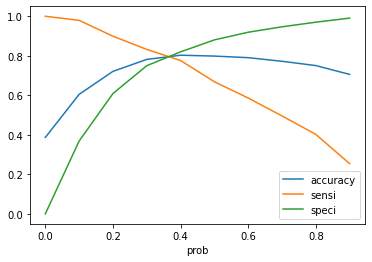

In [92]:
# Plotting the same.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<font color='green'>Inference: From the graph we can confirm that the new optimal cut off for ROC curve is at 0.35</font>

In [93]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.719849,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.072794,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.201567,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.072794,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.465048,0,1,1,1,1,1,0,0,0,0,0,1


In [94]:
# Check the overall accuracy.

print("Accuracy :", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Accuracy : 0.7984569359156038


In [95]:
# Creating confusion matrix.

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3080,  815],
       [ 485, 1971]])

In [96]:
# Substituting the value of true positive.

TP = confusion2[1,1]

# Substituting the value of true negatives.

TN = confusion2[0,0]

# Substituting the value of false positives.

FP = confusion2[0,1] 

# Substituting the value of false negatives.

FN = confusion2[1,0]

In [97]:
print("Accuracy :", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))
print("False Positive rate : ",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print("Negative Predictive Value : ",TN / float(TN+ FN))

Accuracy : 0.7984569359156038
Sensitivity :  0.8025244299674267
Specificity : 0.7907573812580231
False Positive rate :  0.2092426187419769
Positive Predictive Value : 0.7074659009332376
Negative Predictive Value :  0.8639551192145862


<font color='green'>Inference: By using the optimal ROC Curve of 0.35 we are having accuracy of ~80% and ~79% of sentivity and 82.5% specificity.</font>

**STEP 8: PREDICTION ON TEST SET**

In [98]:
# Scaling numeric values.

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [99]:
# Substituting all the columns in the final train model.

col = X_train.columns

In [100]:
# Select the columns in X_train for X_test as well.

X_test = X_test[col]

# Add a constant to X_test.

X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_organic search,Lead Source_welingak website,Do Not Email_yes,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_unreachable
8308,1.0,0.416813,0,1,0,0,0,0,0,0,0,1,0,0
7212,1.0,0.001320,0,0,1,0,0,0,1,0,0,0,1,0
2085,1.0,0.000000,1,0,0,1,0,0,0,0,0,1,0,0
4048,1.0,0.617077,0,1,0,0,0,0,1,0,0,1,0,0
4790,1.0,0.005282,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0,0,0,0,0,1,0,0,0,1,0,0
8179,1.0,0.148768,0,0,0,0,0,0,1,0,0,0,0,0
6236,1.0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0
5240,1.0,0.458627,0,0,0,0,0,0,1,0,0,1,0,0


In [101]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.378983
1,1,0.866255
2,1,0.982271
3,1,0.825452
4,0,0.108996


In [102]:
# Making prediction using cut off 0.35.

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.378983,1
1,1,0.866255,1
2,1,0.982271,1
3,1,0.825452,1
4,0,0.108996,0
...,...,...,...
2718,1,0.074776,0
2719,0,0.332244,0
2720,0,0.072794,0
2721,1,0.833077,1


In [103]:
# Check the overall accuracy.

print("Accuracy :", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Accuracy : 0.7984569359156038


In [104]:
# Creating confusion matrix.

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1382,  362],
       [ 167,  812]])

In [105]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [106]:
print("Accuracy :", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))
print("False Positive rate : ",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print("Negative Predictive Value : ",TN / float(TN+ FN))

Accuracy : 0.7984569359156038
Sensitivity :  0.8294177732379979
Specificity : 0.7924311926605505
False Positive rate :  0.20756880733944955
Positive Predictive Value : 0.6916524701873935
Negative Predictive Value :  0.8921885087153002


Inference: With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%

**STEP 8: PRECISION_RECALL**

In [107]:
# Creating confusion matrix.

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3429,  466],
       [ 814, 1642]])

In [108]:
# Precision = TP / TP + FP.

print("Precision : ", confusion[1,1]/(confusion[0,1]+confusion[1,1]) )

Precision :  0.7789373814041746


In [109]:
#Recall = TP / TP + FN.

print("Recall : ", confusion[1,1]/(confusion[1,0]+confusion[1,1]) )

Recall :  0.6685667752442996


Inference: With cut off of 0.35 we have ~78% precesion and ~67% recall.

**STEP 9: PRECESION AND RECALL TRADEOFF**

In [110]:
from sklearn.metrics import precision_recall_curve

In [111]:
# Getting the predicted values.

y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64, 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [112]:
# Creating and plotting the precesion and recall tradeoff.

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

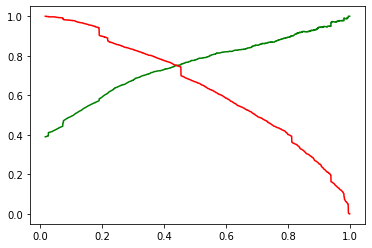

In [113]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

<font color='green'>Comment: Through precesion and recall tradeoff we got out new optimal ROC curve value as 0.41</font>

In [114]:
# Getting the new predicted values with new optimal cut off as 0.41.

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.719849,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.072794,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.201567,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.072794,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.465048,0,1,1,1,1,1,0,0,0,0,0,1


In [115]:
# Accuracy.

print('Accuracy :', metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8033380569988978


In [116]:
# Creating confusion matrix again.

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3210,  685],
       [ 564, 1892]])

In [117]:
# Substituting the value of true positive

TP = confusion2[1,1]

# Substituting the value of true negatives

TN = confusion2[0,0]

# Substituting the value of false positives

FP = confusion2[0,1] 

# Substituting the value of false negatives

FN = confusion2[1,0]

In [118]:
# Precision = TP / TP + FP.

print("Precision : ", TP / (TP + FP))

Precision :  0.7341870391928599


In [119]:
#Recall = TP / TP + FN.

print("Recall : ", TP / (TP + FN))

Recall :  0.7703583061889251


Inference: With new cut off of 0.41 we have precesion of ~73% and recall of ~77%.

**STEP 10: PREDICTION ON TEST SET**

In [120]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.378983
1,1,0.866255
2,1,0.982271
3,1,0.825452
4,0,0.108996


In [121]:
# Making prediction using cut off 0.41.

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.378983,0
1,1,0.866255,1
2,1,0.982271,1
3,1,0.825452,1
4,0,0.108996,0
...,...,...,...
2718,1,0.074776,0
2719,0,0.332244,0
2720,0,0.072794,0
2721,1,0.833077,1


In [122]:
# Check the overall accuracy.

print('Accuracy :', metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted))

Accuracy : 0.8123393316195373


In [123]:
# Creating confusion matrix.
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1439,  305],
       [ 206,  773]])

In [124]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [125]:
# Precision = TP / TP + FP
print('Precision: ',TP / (TP + FP))

Precision:  0.7170686456400742


In [126]:
#Recall = TP / TP + FN
print('Recall: ',TP / (TP + FN))

Recall:  0.7895812053115424


What X Education should do is to follow below category Leads as more chances of getting the conversions <br>
1. Welingak Websiet 
2. Reference 
3. Working Professional
4. Who spent more time on Website
5. Whose last activity was SMS Sent 
6. Whose Lead source is Olark Chat 